In [1]:
#범주형 변수 ----OneHotEncoder---> 이항변수화(0 or 1)
# 성별(남:0,여:1)-----------------> 남:0, 여:1   (남:01, 여:10)
# 나이(20대:0,30대:1,40대:2)-------> 20대:001, 30대:010, 40대:100
# 등급(S, A, B, C, D)-------------> S:00001, A:00010, B:00100, C:01000, D:10000
#                     값들이 0 또는 1의 값을 갖는 가변수(dummy variable)

from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

In [3]:
# #학생ID 성별 연령대     성적
# sn_1     m    20대(0)    A
# ..       ...
# sn_5     f   40대(2)     F

#    성별(0/1),연령(0/1/2),성적(0~4)
data=np.array([[0, 0, 0], 
          [0, 1, 1], 
          [0, 2, 2], #01 012 01234 
          [1, 0, 3], #01 100 00010
          [1, 1, 4]  #01 010 00001        
         ])
data

array([[0, 0, 0],
       [0, 1, 1],
       [0, 2, 2],
       [1, 0, 3],
       [1, 1, 4]])

In [4]:
ohe=OneHotEncoder()

In [5]:
ohe.fit(data) #fitting(적합시킨다)

OneHotEncoder()

In [11]:
#ohe.transform(data)

In [12]:
ohe.transform(data).toarray()
#01 100 00010

array([[1., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [13]:
#Binarizer:연속형 -> 이항변수화(0 or 1)  
#OneHotEncoder:범주형 -> 이항변수화

In [14]:
np.random.seed(11)

In [19]:
#이산형화: 연속형 -> 2개 이상의 범주를 갖는 변수로 변환하는 것, digitize(), where()
#ex)       점수(95) -> 90점이상:A, 80점이상:B, ..., 60점미만:F

df=pd.DataFrame({
    'C1':np.random.randn(20),
    'C2':['a']*10+['b']*10}) # ['a', ..., 'a', 'b',....'b']

In [24]:
df.C1.min() #-1.68411089
df.C1.max() #1.20910164

1.2091016420933416

In [30]:
#df.c1값을 최소~최대값을 9개 구간으로 균등하게 나눔
bins=np.linspace(df.C1.min(),df.C1.max(),10)
bins

array([-1.68411089, -1.36264283, -1.04117477, -0.71970671, -0.39823866,
       -0.0767706 ,  0.24469746,  0.56616552,  0.88763358,  1.20910164])

In [29]:
df.C1

0    -0.237250
1    -1.232346
2    -0.172420
3     0.091838
4     1.067558
5    -1.061634
6     0.217348
7     0.117820
8    -1.684111
9    -1.185755
10    0.600102
11    0.695567
12    1.087711
13    0.533822
14    0.395212
15    0.122868
16    1.209102
17   -0.843066
18   -0.141894
19    0.385354
Name: C1, dtype: float64

In [32]:
# bins=array([-1.68411089, -1.36264283, -1.04117477, -0.71970671, -0.39823866,
#        -0.0767706 ,  0.24469746,  0.56616552,  0.88763358,  1.20910164])

df['C1_bin']=np.digitize(df['C1'], bins)

In [33]:
df

,C1,C2,C1_bin
0,-0.237250,a,5
1,-1.232346,a,2
2,-0.172420,a,5
3,0.091838,a,6
4,1.067558,a,9
5,-1.061634,a,2
6,0.217348,a,6
7,0.117820,a,6
8,-1.684111,a,1
9,-1.185755,a,2


In [35]:
df.groupby('C1_bin')['C1'].size()

C1_bin
1     1
2     3
3     1
5     3
6     4
7     3
8     2
9     2
10    1
Name: C1, dtype: int64

In [38]:
#각 그룹별 평균
df.groupby('C1_bin')['C1'].mean()
df.groupby('C1_bin')['C1'].std()

C1_bin
1          NaN
2     0.088241
3          NaN
5     0.048696
6     0.054961
7     0.083019
8     0.067504
9     0.014250
10         NaN
Name: C1, dtype: float64

In [39]:
#c1_bin 컬럼을 기준으로 그룹화 한 다음 그룹별 c2 컬럼 값의 종류별 개수를 출력

In [41]:
df.groupby('C1_bin')['C2'].value_counts()
# 각(10개) 그룹별['C2']

C1_bin  C2
1       a     1
2       a     3
3       b     1
5       a     2
        b     1
6       a     3
        b     1
7       b     3
8       b     2
9       a     1
        b     1
10      b     1
Name: C2, dtype: int64

In [ ]:
df의 'C1_bin'열의 값이 2와 같은 데이터만 출력

In [44]:
df[df['C1_bin']==2]

,C1,C2,C1_bin
1,-1.232346,a,2
5,-1.061634,a,2
9,-1.185755,a,2


In [ ]:
# #                  #원핫인코딩
# id 과일명   id   사과 바나나 딸기
# 1 사과       1    1     0     0
# 2 바나나     2    0     1     0
# 3 딸기       3    0     0     1

In [47]:
fruit=pd.DataFrame({"name": ['apple','banana', 'cherry', 'durian', np.nan,'banana'],
             "color":['red','yellow','red','green', np.nan,'yellow']
             })

In [51]:
pd.get_dummies(fruit['name'], dummy_na=True)

,apple,banana,cherry,durian,NaN
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1
5,0,1,0,0,0


In [52]:
pd.get_dummies(fruit,columns=['name'],dummy_na=True)
#특정 열만 인코딩

,color,name_apple,name_banana,name_cherry,name_durian,name_nan
0,red,1,0,0,0,0
1,yellow,0,1,0,0,0
2,red,0,0,1,0,0
3,green,0,0,0,1,0
4,NaN,0,0,0,0,1
5,yellow,0,1,0,0,0


In [54]:
df['high_low']=np.where(df['C1']>df.C1.mean(), 'high', 'low')
#np.where 연속형 변수 -> 이산형화
#c1열의 평균값보다 크면 'high', 작으면 'low' 값을 df['high_low'] 변수에 저장

In [58]:
df.groupby('high_low')['C1'].size()
#df의 high_low열에 대해 그룹화했을때 각 그룹에 대한 크기를 출력하시오

df.groupby('high_low')['C1'].mean()
df.groupby('high_low')['C1'].std()

high_low
high    0.399518
low     0.576715
Name: C1, dtype: float64

In [61]:
q1=np.percentile(df['C1'],25) #25% 지점의 수(1사분위수)
q3=np.percentile(df['C1'],75) #75% 지점의 수(3사분위수)

In [66]:
#df의 c1열 값이 3사분위수보다 크면 'high',그렇지 않고 1사분위수보다 크면 'medium',
#그렇지 않으면 'low'
df['hml']=np.where(df['C1']>=q3, 'high', np.where(df['C1']>=q1, 'medium','low'))

df #'hml' 컬럼값에 대해 그룹화, 각 그룹별 크기, 평균, 표준편차를 출력
df.groupby('hml')['C1'].mean()
df.groupby('hml')['C1'].size()
df.groupby('hml')['C1'].std()

hml
high      0.267144
low       0.309091
medium    0.259945
Name: C1, dtype: float64

In [49]:
pd.get_dummies(fruit)

,name_apple,name_banana,name_cherry,name_durian,color_green,color_red,color_yellow
0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1
2,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1


In [68]:
#구간 나누는 작업
"""
np.arange():부터~까지, 단위로 나눔
np.linspace():구간을 나눔 ex)히스토그램
np.bincount():구간별 데이터 개수 셈
np.digitize:구간을 나눔 -> 매핑(구간 단위로 0 or 1...)
"""

'\nnp.arange():부터~까지, 단위로 나눔\nnp.linspace():구간을 나눔 ex)히스토그램\nnp.bincount():구간별 데이터 개수 셈\nnp.digitize:구간을 나눔 -> 매핑(구간 단위로 0 or 1...)\n'

In [70]:
np.arange(-1, 1, 0.1) #-1에서 1까지 0.1씩 증가, 1은 포함 안됨
np.arange(-1, 1.05, 0.1) #1에서 1.1 사이의 임의의 값을 주면  구간에 1까지 포함

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

In [72]:
np.linspace(-1, 1, 20) #20개로 나눔
np.linspace(-1, 1, 21) #1도 포함됨

array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
        0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [76]:
np.random.randint(10, size=5) #0~9사이의 임의의 정수 난수 5개 발생
arr=np.random.randint(10, size=100) #0~9사이의 임의의 정수 난수 100개 발생
arr

array([7, 0, 1, 0, 5, 7, 4, 6, 2, 4, 2, 7, 1, 1, 5, 1, 3, 3, 2, 3, 3, 2,
       0, 9, 2, 3, 0, 8, 3, 7, 2, 9, 7, 2, 2, 6, 9, 1, 1, 6, 5, 1, 8, 1,
       8, 6, 2, 6, 1, 6, 8, 9, 2, 9, 3, 4, 9, 4, 5, 3, 1, 9, 5, 9, 8, 9,
       5, 2, 0, 7, 1, 0, 0, 1, 2, 2, 9, 6, 3, 1, 0, 0, 1, 7, 8, 8, 7, 3,
       4, 0, 1, 9, 5, 6, 7, 7, 5, 0, 9, 3])

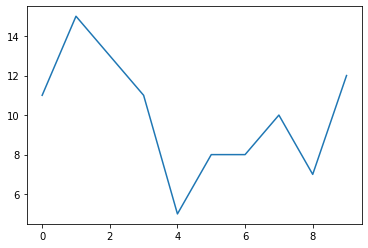

In [79]:
np.bincount(arr) #0~9까지 각각의 데이터 개수, 0이 11개, 1이 15개...
import matplotlib.pyplot as plt
plt.plot(np.bincount(arr) )

In [80]:
np.bincount([7,5,5,6,7])
#0~7까지 범위에 대해, 각각의 데이터 개수가 출력 5가2개,...

array([0, 0, 0, 0, 0, 2, 1, 2], dtype=int64)

In [84]:
scores=[60, 95, 77, 85, 50, 65, 92, 90, 70] #수우미양가 출력
g=np.digitize(scores, bins=[60,70,80,90]) # ~59, 60~69, ..., 90~
                                        #   0,    1,   ..., 4
#g = array([1, 4, 2, 3, 0, 1, 4, 4, 2], dtype=int64)
#0:가, 1:양, ..., 4:수
grade=['가','양','미','우','수']
res=[grade[i] for i in g]    
#['수','미','우','가','양','수']

In [85]:
print(res)

['양', '수', '미', '우', '가', '양', '수', '수', '미']


In [ ]:
#데이터 재구조화:pivot, pivot_table, stack/unstack,melt, wide_to_long,...

In [ ]:
#df.pivot(index, columns, values)
#df.pivot_table(data, index, columns, values)

# index col   val
# 1    매출1  100
# 1    매출1  200  
# 2    매입1  300
# 2    매입1  400
# =>재구조화
# index  매출1   매입1
#  1      100     300
#  2      200     400





In [89]:
data = pd.DataFrame({'cust_id': ['c1', 'c1', 'c1', 'c2', 'c2', 'c2', 'c3', 'c3', 'c3'],
   'prod_cd': ['p1', 'p2', 'p3', 'p1', 'p2', 'p3', 'p1', 'p2', 'p3'],
   'grade' : ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B'],
   'pch_amt': [30, 10, 0, 40, 15, 30, 0, 0, 10]})
data

,cust_id,prod_cd,grade,pch_amt
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [91]:
#df.pivot(index, columns, values) #pivot < pivot_table 함수를 주로 사용

#데이터프레임.pivot()
df_pivot=data.pivot(index='cust_id', columns='prod_cd', values='pch_amt')
df_pivot

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [93]:
df_pivot_t=pd.pivot_table(data, index='cust_id', columns='prod_cd', values='pch_amt')
df_pivot_t

#df.pivot_table(data, index, columns, values)

prod_cd,p1,p2,p3
cust_id,,,
c1,30,10,0
c2,40,15,30
c3,0,0,10


In [97]:
data
#index:cust_id, grade
#columns:prod_cd
#values:pch_amt


#data.pivot(index=['cust_id','grade'], columns='prod_cd', values='pch_amt') #인덱스가 2개 이상인 경우, 에러발생
pd.pivot_table(data, index=['cust_id','grade'], columns='prod_cd', values='pch_amt')  #인덱스가 2개 이상인 경우, 정상수행

,prod_cd,p1,p2,p3
cust_id,grade,,,
c1,A,30,10,0
c2,A,40,15,30
c3,B,0,0,10


In [99]:
data

,cust_id,prod_cd,grade,pch_amt
0,c1,p1,A,30
1,c1,p2,A,10
2,c1,p3,A,0
3,c2,p1,A,40
4,c2,p2,A,15
5,c2,p3,A,30
6,c3,p1,B,0
7,c3,p2,B,0
8,c3,p3,B,10


In [107]:
#data.pivot(index='cust_id', columns=['grade','prod_cd'], values='pch_amt') #인덱스가 2개 이상인 경우, 에러발생

#pd.pivot_table(data, index=['cust_id'], columns=['prod_cd','grade'], values='pch_amt')  #인덱스가 2개 이상인 경우, 정상수행
#

pd.pivot_table(data, index=['cust_id'], columns=['grade','prod_cd'], values='pch_amt')  #인덱스가 2개 이상인 경우, 정상수행

grade       A                B           
prod_cd    p1    p2    p3   p1   p2    p3
cust_id                                  
c1       30.0  10.0   0.0  NaN  NaN   NaN
c2       40.0  15.0  30.0  NaN  NaN   NaN
c3        NaN   NaN   NaN  0.0  0.0  10.0

In [111]:
#data.pivot(index='grade', columns='prod_cd', values='pch_amt')

#pd.pivot_table(data, index='grade', columns='prod_cd', values='pch_amt')
pd.pivot_table(data, index='grade', columns='prod_cd', values='pch_amt', aggfunc=np.sum)
#aggfunc 생략시 np.mean 적용(디폴트)

prod_cd,p1,p2,p3
grade,,,
A,70,25,30
B,0,0,10


In [113]:
pd.pivot_table(data, index='grade', columns='prod_cd', values='pch_amt', aggfunc=np.sum, margins=True)

prod_cd,p1,p2,p3,All
grade,,,,
A,70,25,30,125
B,0,0,10,10
All,70,25,40,135


In [114]:
pd.pivot_table(data, index='grade', columns='prod_cd', values='pch_amt', aggfunc=np.mean, margins=True)

prod_cd,p1,p2,p3,All
grade,,,,
A,35.000000,12.500000,15.000000,20.833333
B,0.000000,0.000000,10.000000,3.333333
All,23.333333,8.333333,13.333333,15.000000


In [115]:
#튜플로 부터 가져온 데이터로 다중인덱스를 만듬
mulIndex=pd.MultiIndex.from_tuples([('c1', '2020'), ('c1', '2021'), 
                                    ('c2', '2020'), ('c2', '2021')])

In [116]:
mulIndex

MultiIndex([('c1', '2020'),
            ('c1', '2021'),
            ('c2', '2020'),
            ('c2', '2021')],
           )

In [120]:
data=pd.DataFrame(np.arange(16).reshape(4,4),
            index=mulIndex,
            columns=['p1','p2','p3','p4'])
data

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [123]:
#데이터프레임 -> stack -> 시리즈
dataStacked=data.stack()
dataStacked
#type(dataStacked)  Series

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [129]:
dataStacked.index
dataStacked['c2']
dataStacked['c2']['2020']
dataStacked['c2']['2020'][['p3','p4']]

p3    10
p4    11
dtype: int32

In [140]:
dataStacked
dataStacked['c2']['2020']['p4']=np.nan


In [141]:
dataStacked

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32

In [142]:
# data=pd.DataFrame(np.arange(16).reshape(4,4),
#             index=mulIndex,
#             columns=['p1','p2','p3','p4'])
# dataStacked=data.stack()
# dataStacked

In [143]:
data

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [146]:
data.loc['c2', 'p4']=np.nan

In [147]:
data

p1  p2  p3   p4
c1 2020   0   1   2  3.0
   2021   4   5   6  7.0
c2 2020   8   9  10  NaN
   2021  12  13  14  NaN

In [149]:
#data.stack() #결측값을 제거(dropna=True, 디폴트)
data.stack(dropna=False)#결측값을 출력

c1  2020  p1     0.0
          p2     1.0
          p3     2.0
          p4     3.0
    2021  p1     4.0
          p2     5.0
          p3     6.0
          p4     7.0
c2  2020  p1     8.0
          p2     9.0
          p3    10.0
          p4     NaN
    2021  p1    12.0
          p2    13.0
          p3    14.0
          p4     NaN
dtype: float64

In [153]:
print(dataStacked)
#level 3개(대/중/소)
print(dataStacked.unstack())

c1  2020  p1     0
          p2     1
          p3     2
          p4     3
    2021  p1     4
          p2     5
          p3     6
          p4     7
c2  2020  p1     8
          p2     9
          p3    10
          p4    11
    2021  p1    12
          p2    13
          p3    14
          p4    15
dtype: int32
         p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15


In [155]:
print(dataStacked.unstack(level=-1)) #디폴트

         p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15


In [156]:
print(dataStacked.unstack(level=0))

         c1  c2
2020 p1   0   8
     p2   1   9
     p3   2  10
     p4   3  11
2021 p1   4  12
     p2   5  13
     p3   6  14
     p4   7  15


In [157]:
print(dataStacked.unstack(level=1))

       2020  2021
c1 p1     0     4
   p2     1     5
   p3     2     6
   p4     3     7
c2 p1     8    12
   p2     9    13
   p3    10    14
   p4    11    15


In [161]:
type(dataStacked.unstack())
dataStacked.unstack()

p1  p2  p3  p4
c1 2020   0   1   2   3
   2021   4   5   6   7
c2 2020   8   9  10  11
   2021  12  13  14  15

In [164]:
df=dataStacked.unstack().reset_index()
df
df.rename(columns={'level_0':'c_id', 'level_1':'year'}, inplace=True)
df

,c_id,year,p1,p2,p3,p4
0,c1,2020,0,1,2,3
1,c1,2021,4,5,6,7
2,c2,2020,8,9,10,11
3,c2,2021,12,13,14,15


In [171]:
df=pd.DataFrame(np.arange(6).reshape(2,3),
                columns=pd.Index(['one','two','three'], name='number'),
               index=pd.Index(['Ohio', 'Colorado'],name='state')) #index=['Ohio', 'Colorado']
print(df)

df.stack()

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [172]:
#melt:재구조화

In [175]:
data = pd.DataFrame({'cust_ID' : ['C_001', 'C_001', 'C_002', 'C_002'],
   'prd_CD' : ['P_001', 'P_002', 'P_001', 'P_002'],
   'pch_cnt' : [1, 2, 3, 4],
   'pch_amt' : [100, 200, 300, 400]})
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [176]:
pd.melt(data, id_vars=['cust_ID', 'prd_CD'])

,cust_ID,prd_CD,variable,value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [178]:
pd.melt(data, id_vars=['cust_ID', 'prd_CD'], var_name='pch_CD', value_name='pch_value')

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [179]:
data

,cust_ID,prd_CD,pch_cnt,pch_amt
0,C_001,P_001,1,100
1,C_001,P_002,2,200
2,C_002,P_001,3,300
3,C_002,P_002,4,400


In [180]:
data_melt=pd.melt(data, id_vars=['cust_ID', 'prd_CD'], var_name='pch_CD', value_name='pch_value')
data_melt

,cust_ID,prd_CD,pch_CD,pch_value
0,C_001,P_001,pch_cnt,1
1,C_001,P_002,pch_cnt,2
2,C_002,P_001,pch_cnt,3
3,C_002,P_002,pch_cnt,4
4,C_001,P_001,pch_amt,100
5,C_001,P_002,pch_amt,200
6,C_002,P_001,pch_amt,300
7,C_002,P_002,pch_amt,400


In [182]:
data_melt.index
data_melt.columns

Index(['cust_ID', 'prd_CD', 'pch_CD', 'pch_value'], dtype='object')

In [184]:
datamelt_pivot=pd.pivot_table(data_melt, index=['cust_ID', 'prd_CD'],
              columns='pch_CD',
              values='pch_value')
datamelt_pivot.index

MultiIndex([('C_001', 'P_001'),
            ('C_001', 'P_002'),
            ('C_002', 'P_001'),
            ('C_002', 'P_002')],
           names=['cust_ID', 'prd_CD'])

In [185]:
datamelt_pivot.columns

Index(['pch_amt', 'pch_cnt'], dtype='object', name='pch_CD')

In [186]:
#melt, pivot_table 메서드 적용

In [187]:
pew=pd.read_csv("pew.csv")
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [190]:
pew_long=pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long.head()

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [191]:
billboard=pd.read_csv("billboard.csv")
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
billboard.shape

(317, 81)

In [194]:
# year	artist	track	time	date.entered	week    rating
# ...........................                     wk1      87
# ..........................                      wk1      91
#                       ...
# ...........................                     wk2      82  

pd.melt(billboard,id_vars=['year','artist','track','time','date.entered'],
       var_name='week', value_name='rating')

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [2]:
ebola=pd.read_csv("country_timeseries.csv")
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [3]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Date	Day	       variable value
# 1/5/2015	289	Cases_Guinea 2776.0
# 1/4/2015	288 Cases_Guinea 2775.0
# ...
ebola_long=pd.melt(ebola, id_vars=['Date','Day'])

In [13]:
#       Date	    Day	  variable	value
# 0	1/5/2015	289	Cases_Guinea	2776.0
# 1	1/4/2015	288	Cases_Guinea	2775.0
# ...

# => 변경

#       Date	    Day	  variable	    value       status    country
# 0	1/5/2015	289	Cases_Guinea	2776.0       Cases    Guinea            
# 1	1/4/2015	288	Cases_Guinea	2775.0       Cases    Guinea  
var_split=ebola_long.variable.str.split("_")
sta_value=var_split.str.get(0)
coun_value=var_split.str.get(1)

In [14]:
ebola_long['status']=sta_value
ebola_long['country']=coun_value
ebola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


In [15]:
weather=pd.read_csv("weather.csv")

In [21]:
weather
#       id	year	month	element  day   temp
# 0	MX17004	2010	1	     tmax    d1    NaN
# 1	MX17004	2010	1	     tmin    d1    NaN
#  ...
weather_melt=pd.melt(weather, id_vars=['id','year','month','element'],
       var_name='day', value_name='temp')
weather_melt

weather_tidy=weather_melt.pivot_table(
index=['id', 'year','month', 'day'],
    columns='element',
    values='temp'
)

weather_tidy.reset_index()

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2
